In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

import warnings

# Ignorar avisos FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
div = 432000

def cria_df(theta, job):

    frame00 = 0
    job01 = job
    job02 = job+10
    frame = str(frame00).zfill(6)


    dir00 = f"/media/davi/5D2B1E564C611892/Simulação - Doutorado/"
    dir01 = f"sim03/theta_{theta}._job_{job01}/MCResultados/"
    dir02 = f"sim04/theta_{theta}._job_{job02}/MCResultados/"


    Temps01 = pd.read_csv(dir00+dir01+'infos.dat', sep='\s+', skiprows=4, index_col=0, header=None).reset_index(drop=True)
    Temps01.columns = ['Temp']
    Temps02 = pd.read_csv(dir00+dir02+'infos.dat', sep='\s+', skiprows=5, index_col=0, header=None).reset_index(drop=True)
    Temps02.columns = ['Temp']
    Temps = pd.concat([Temps01, Temps02]).reset_index(drop=True)
    # arq01 = dir00 + f"cargas_Temp/"


    data_K = pd.DataFrame(pd.read_csv(dir00+dir01+f'cargas_Temp/CargaK_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts()).reset_index()
    data_T = pd.DataFrame(pd.read_csv(dir00+dir01+f'cargas_Temp/CargaT_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts()).reset_index()



    for i in range(1, 49):
        frame = str(i).zfill(6)
        data_K1 = pd.DataFrame(pd.read_csv(dir00+dir01+f'cargas_Temp/CargaK_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts())
        data_K = pd.merge(data_K, data_K1.reset_index(), on='index', how='outer')

        data_T1 = pd.DataFrame(pd.read_csv(dir00+dir01+f'cargas_Temp/CargaT_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts())
        data_T = pd.merge(data_T, data_T1.reset_index(), on='index', how='outer')

    for i in range(0, 50):
        frame = str(i).zfill(6)
        data_K1 = pd.DataFrame(pd.read_csv(dir00+dir02+f'cargas_Temp/CargaK_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts())
        data_K = pd.merge(data_K, data_K1.reset_index(), on='index', how='outer')

        data_T1 = pd.DataFrame(pd.read_csv(dir00+dir02+f'cargas_Temp/CargaT_{frame}.dat', sep='\s+', header=None).round(4).stack().value_counts())
        data_T = pd.merge(data_T, data_T1.reset_index(), on='index', how='outer')

    data_K.fillna(0, inplace=True)
    data_T.fillna(0, inplace=True)

    data_K.columns = range(-1,99)
    data_K = data_K.T
    data_K.columns = data_K.iloc[0]
    data_K = data_K[1:].reset_index(drop=True)

    data_T.columns = range(-1,99)
    data_T = data_T.T
    data_T.columns = data_T.iloc[0]
    data_T = data_T[1:].reset_index(drop=True)

    data_K = pd.merge(Temps, data_K, left_index=True, right_index=True)
    data_T = pd.merge(Temps, data_T, left_index=True, right_index=True)
    
    return data_K, data_T

In [3]:
carga_K, carga_T = cria_df(10, 115)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.3283, -0.3283, -0.9848, 0.9848, 2.9544, -2.9544], dtype='object') 
 Index([ 'Temp',    -0.0,  0.0579, -0.0579, -0.1158,  0.1158, -0.1736,  0.1736,
       -0.0289,  0.0289,  0.0868, -0.0868, -0.1447,  0.1447, -0.3473,  0.3473,
        0.6946, -0.6946, -1.0419,  1.0419],
      dtype='object')


In [4]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'

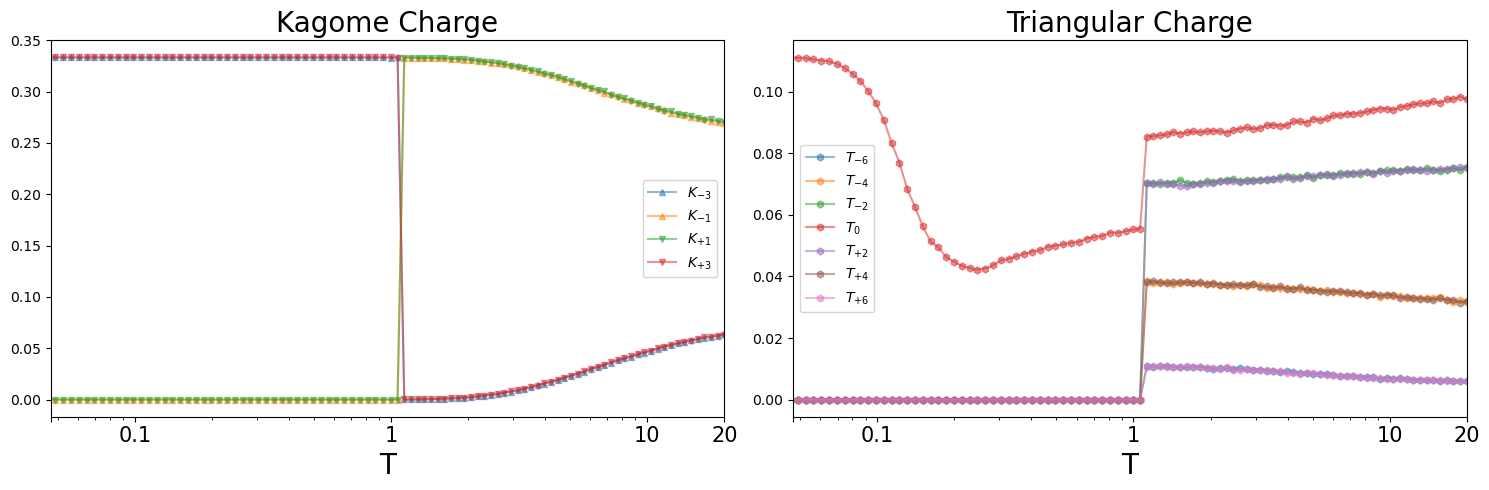

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=5)
ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=5)
ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=5)
ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=5)


ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=5)
ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=5)


ax[0].set_title('Kagome Charge', fontsize=20)
ax[1].set_title('Triangular Charge', fontsize=20)

for i in [0,1]:
    ax[i].set_xscale('log')
    ax[i].legend()
    ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
    ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
    ax[i].set_xlabel('T', fontsize=20)
    ax[i].set_xlim(0.047, 20)

plt.tight_layout()

plt.savefig('teste.png', dpi=250)

In [6]:
carga_K, carga_T = cria_df(0, 114)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 1.0, -1.0, -3.0, 3.0, -0.3333, 0.3333], dtype='object') 
 Index(['Temp', -0.0], dtype='object')


In [7]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
# carga_T.columns.values[2] = 'T-2'
# carga_T.columns.values[3] = 'T+2'
# carga_T.columns.values[4] = 'T+4'
# carga_T.columns.values[5] = 'T-4'
# carga_T.columns.values[6] = 'T-6'
# carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K+1', 'K-1', 'K-3', 'K+3', -0.3333, 0.3333], dtype='object') 
 Index(['Temp', 'T0'], dtype='object')


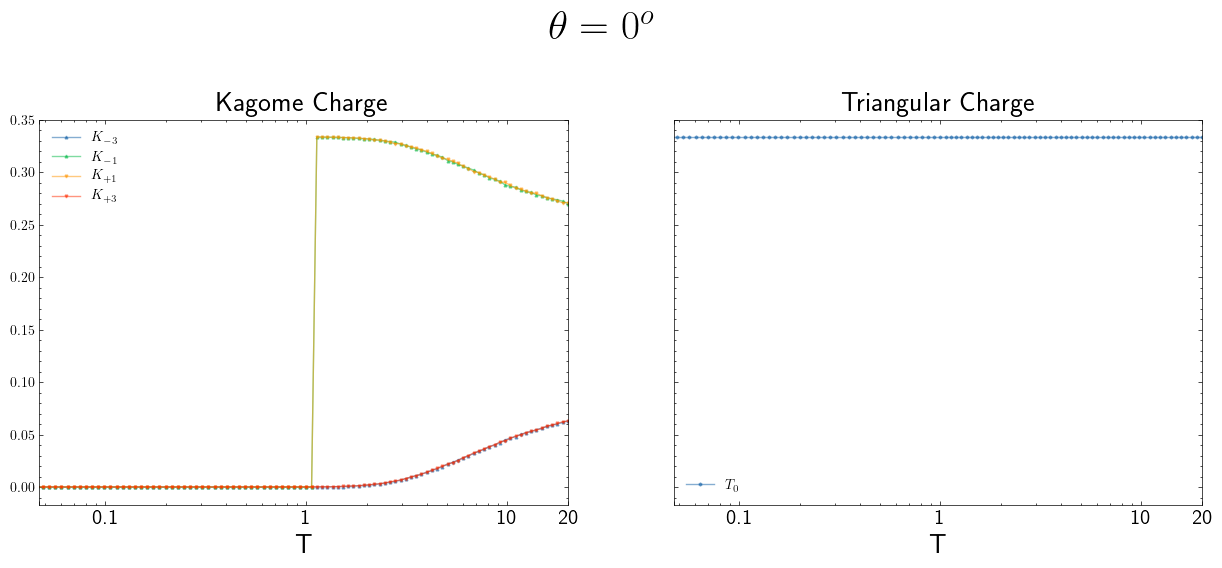

In [8]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    # ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=5)
    # ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=5)
    # ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=5)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    # ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=5)
    # ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=5)
    # ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=5)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 0^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_0.png', dpi=250)

In [9]:
carga_K

,Temp,K+1,K-1,K-3,K+3,-0.3333,0.3333
0,20.000000,117022.0,116584.0,27270.0,27124.0,0.0,0.0
1,18.836898,116987.0,117623.0,26589.0,26801.0,0.0,0.0
2,17.741437,117676.0,118195.0,25978.0,26151.0,0.0,0.0
3,16.709682,118606.0,118483.0,25476.0,25435.0,0.0,0.0
4,15.737930,118854.0,119100.0,24982.0,25064.0,0.0,0.0
...,...,...,...,...,...,...,...
94,0.045695,0.0,0.0,0.0,0.0,144000.0,144000.0
95,0.042600,0.0,0.0,0.0,0.0,144000.0,144000.0
96,0.039715,0.0,0.0,0.0,0.0,144000.0,144000.0
97,0.037025,0.0,0.0,0.0,0.0,144000.0,144000.0


In [106]:
carga_K, carga_T = cria_df(10, 115)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.9848, -0.9848, -2.9544, 2.9544], dtype='object') 
 Index(['Temp', 0.0, -0.3473, 0.3473, 0.6946, -0.6946, -1.0419, 1.0419], dtype='object')


In [107]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K+1', 'K-1', 'K-3', 'K+3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T+4', 'T-4', 'T-6', 'T+6'], dtype='object')


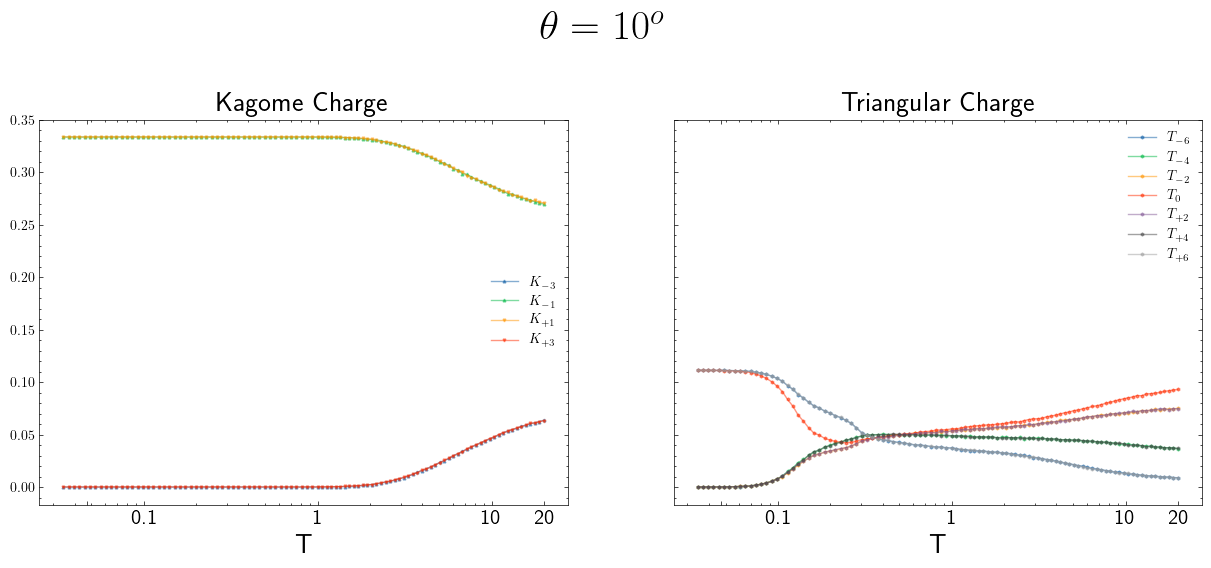

In [108]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 10^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_10.png', dpi=250)

In [109]:
carga_K, carga_T = cria_df(20, 116)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', -0.9397, 0.9397, 2.8191, -2.8191], dtype='object') 
 Index(['Temp', 0.0, -0.684, 0.684, 1.3681, -1.3681, -2.0521, 2.0521], dtype='object')


In [110]:
carga_K.columns.values[1] = 'K-1'
carga_K.columns.values[2] = 'K+1'
carga_K.columns.values[3] = 'K+3'
carga_K.columns.values[4] = 'K-3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K-1', 'K+1', 'K+3', 'K-3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T+4', 'T-4', 'T-6', 'T+6'], dtype='object')


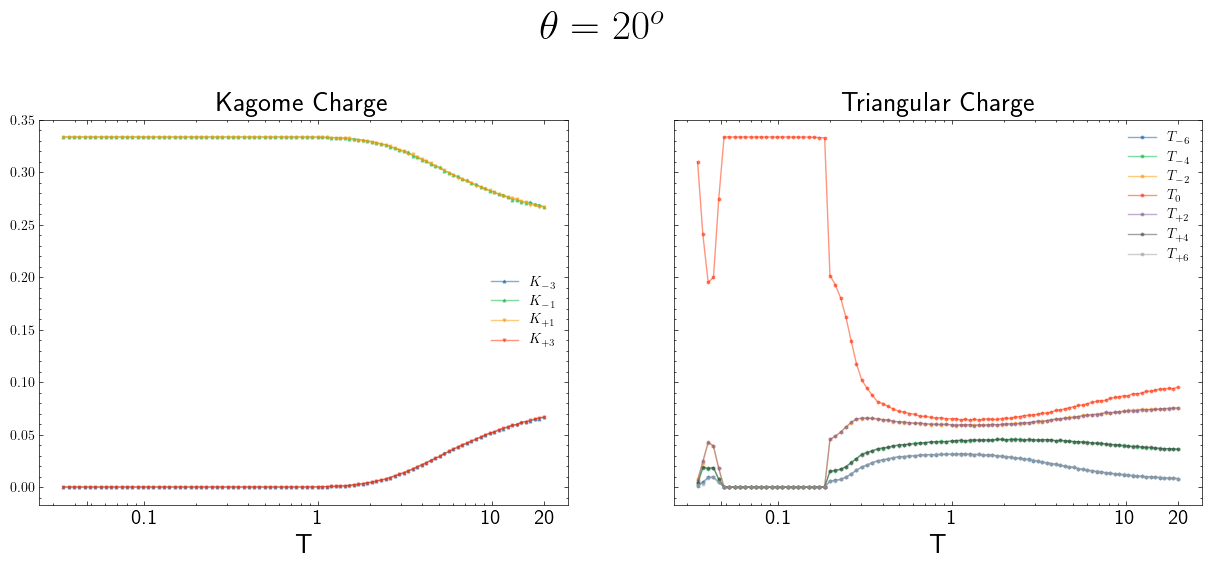

In [111]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 20^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_20.png', dpi=250)

In [112]:
carga_K, carga_T = cria_df(30, 117)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', -0.866, 0.866, 2.5981, -2.5981], dtype='object') 
 Index(['Temp', 0.0, -1.0, 1.0, 2.0, -2.0, -3.0, 3.0], dtype='object')


In [113]:
carga_K.columns.values[1] = 'K-1'
carga_K.columns.values[2] = 'K+1'
carga_K.columns.values[3] = 'K+3'
carga_K.columns.values[4] = 'K-3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K-1', 'K+1', 'K+3', 'K-3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T+4', 'T-4', 'T-6', 'T+6'], dtype='object')


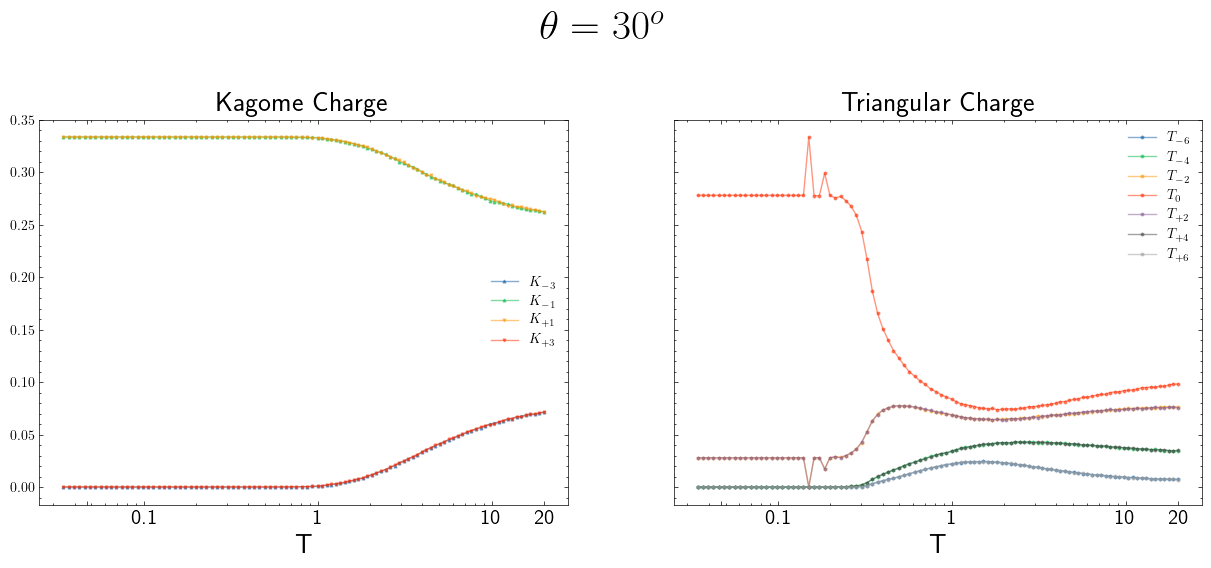

In [114]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 30^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_30.png', dpi=250)

In [115]:
carga_K, carga_T = cria_df(40, 118)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.766, -0.766, -2.2981, 2.2981], dtype='object') 
 Index(['Temp', -0.0, 1.2856, -1.2856, -2.5712, 2.5712, -3.8567, 3.8567], dtype='object')


In [116]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T+2'
carga_T.columns.values[3] = 'T-2'
carga_T.columns.values[4] = 'T-4'
carga_T.columns.values[5] = 'T+4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K+1', 'K-1', 'K-3', 'K+3'], dtype='object') 
 Index(['Temp', 'T0', 'T+2', 'T-2', 'T-4', 'T+4', 'T-6', 'T+6'], dtype='object')


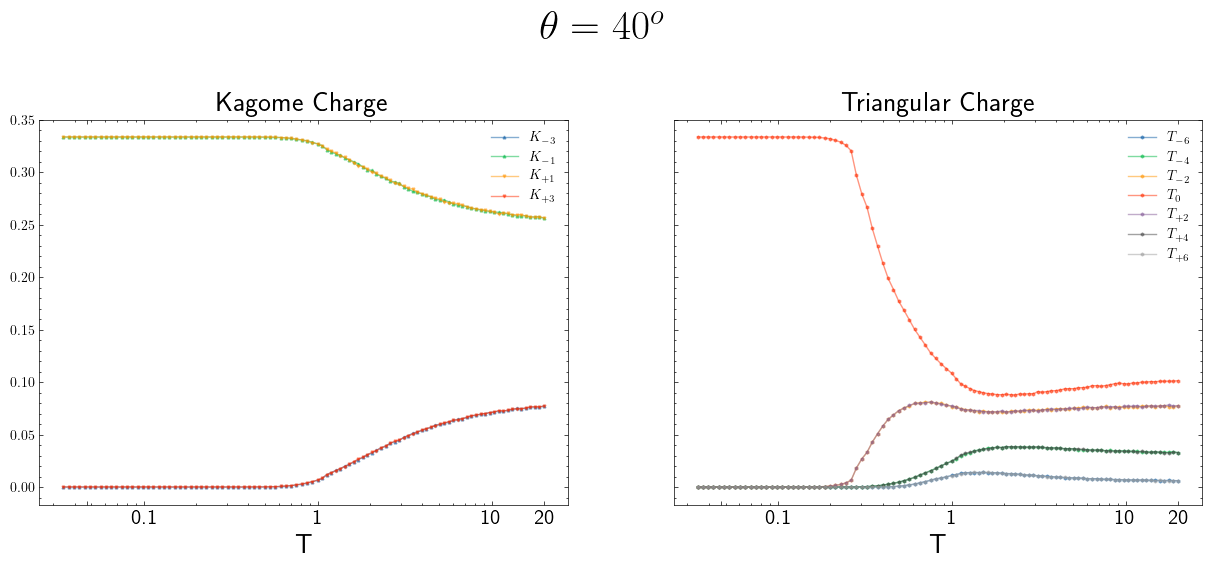

In [118]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 40^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_40.png', dpi=250)

In [119]:
carga_K, carga_T = cria_df(50, 119)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.6428, -0.6428, -1.9284, 1.9284], dtype='object') 
 Index(['Temp', 0.0, 1.5321, -1.5321, 3.0642, -3.0642, -4.5963, 4.5963], dtype='object')


In [120]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T+2'
carga_T.columns.values[3] = 'T-2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K+1', 'K-1', 'K-3', 'K+3'], dtype='object') 
 Index(['Temp', 'T0', 'T+2', 'T-2', 'T+4', 'T-4', 'T-6', 'T+6'], dtype='object')


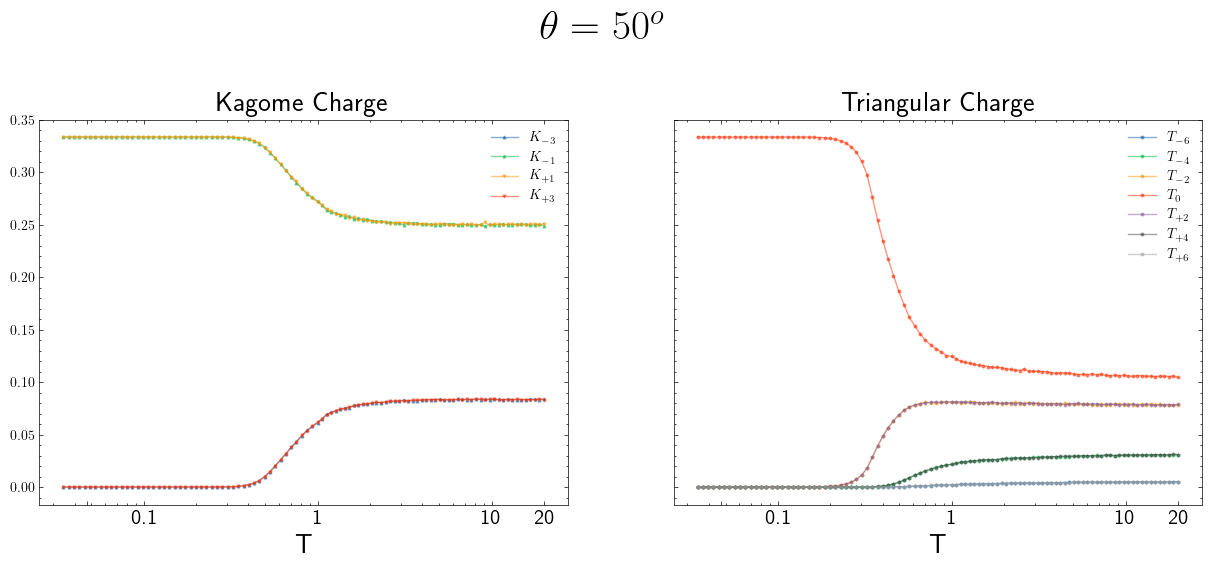

In [121]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 50^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_50.png', dpi=250)

In [122]:
carga_K, carga_T = cria_df(60, 120)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.5, -0.5, -1.5, 1.5], dtype='object') 
 Index(['Temp', -0.0, -1.7321, 1.7321, 3.4641, -3.4641, -5.1962, 5.1962], dtype='object')


In [123]:
carga_K.columns.values[1] = 'K+1'
carga_K.columns.values[2] = 'K-1'
carga_K.columns.values[3] = 'K-3'
carga_K.columns.values[4] = 'K+3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K+1', 'K-1', 'K-3', 'K+3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T+4', 'T-4', 'T-6', 'T+6'], dtype='object')


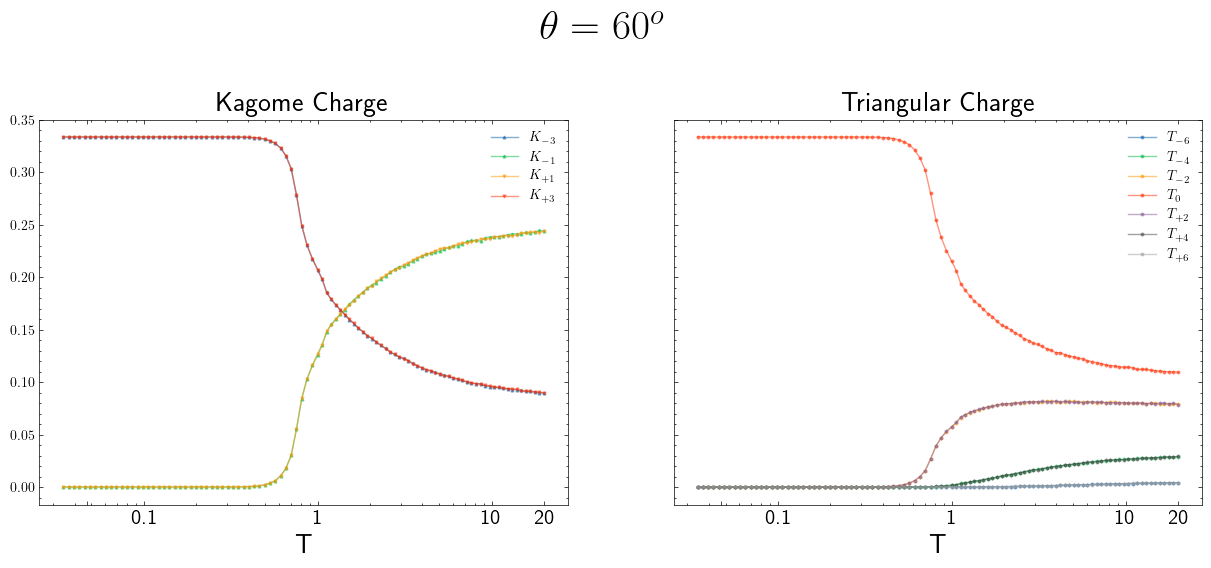

In [124]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 60^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_60.png', dpi=250)

In [125]:
carga_K, carga_T = cria_df(70, 121)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', -0.342, 0.342, 1.0261, -1.0261], dtype='object') 
 Index(['Temp', -0.0, -1.8794, 1.8794, -3.7588, 3.7588, 5.6382, -5.6382], dtype='object')


In [126]:
carga_K.columns.values[1] = 'K-1'
carga_K.columns.values[2] = 'K+1'
carga_K.columns.values[3] = 'K+3'
carga_K.columns.values[4] = 'K-3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T-4'
carga_T.columns.values[5] = 'T+4'
carga_T.columns.values[6] = 'T+6'
carga_T.columns.values[7] = 'T-6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K-1', 'K+1', 'K+3', 'K-3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T-4', 'T+4', 'T+6', 'T-6'], dtype='object')


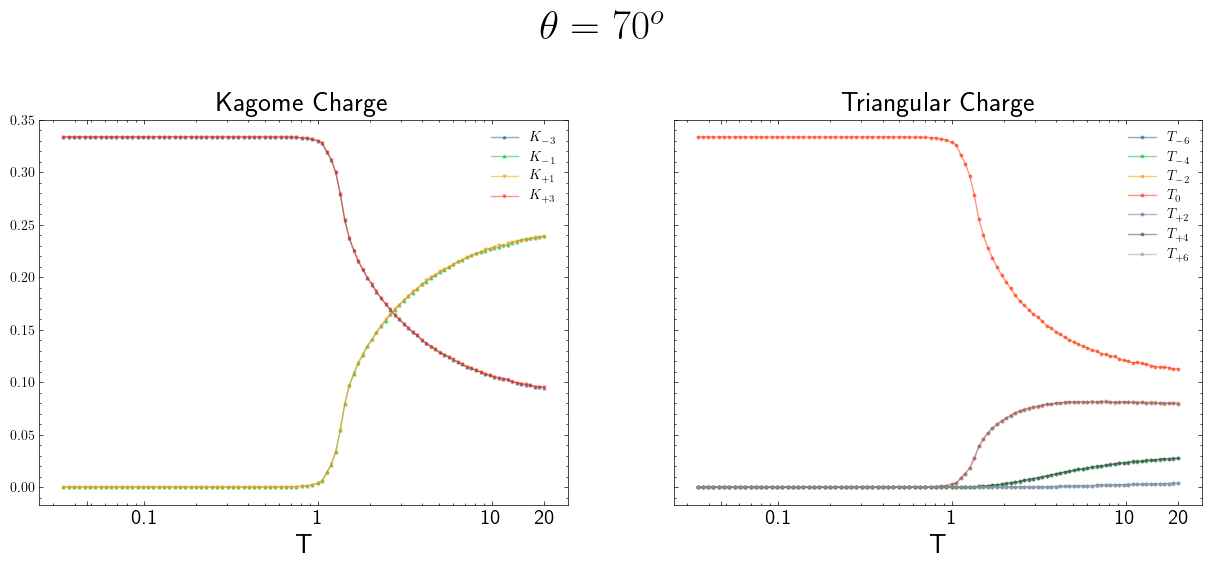

In [127]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 70^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_70.png', dpi=250)

In [128]:
carga_K, carga_T = cria_df(80, 122)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', -0.1736, 0.1736, 0.5209, -0.5209], dtype='object') 
 Index(['Temp', 0.0, -1.9696, 1.9696, 3.9392, -3.9392, 5.9088, -5.9088], dtype='object')


In [129]:
carga_K.columns.values[1] = 'K-1'
carga_K.columns.values[2] = 'K+1'
carga_K.columns.values[3] = 'K+3'
carga_K.columns.values[4] = 'K-3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T-2'
carga_T.columns.values[3] = 'T+2'
carga_T.columns.values[4] = 'T+4'
carga_T.columns.values[5] = 'T-4'
carga_T.columns.values[6] = 'T+6'
carga_T.columns.values[7] = 'T-6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K-1', 'K+1', 'K+3', 'K-3'], dtype='object') 
 Index(['Temp', 'T0', 'T-2', 'T+2', 'T+4', 'T-4', 'T+6', 'T-6'], dtype='object')


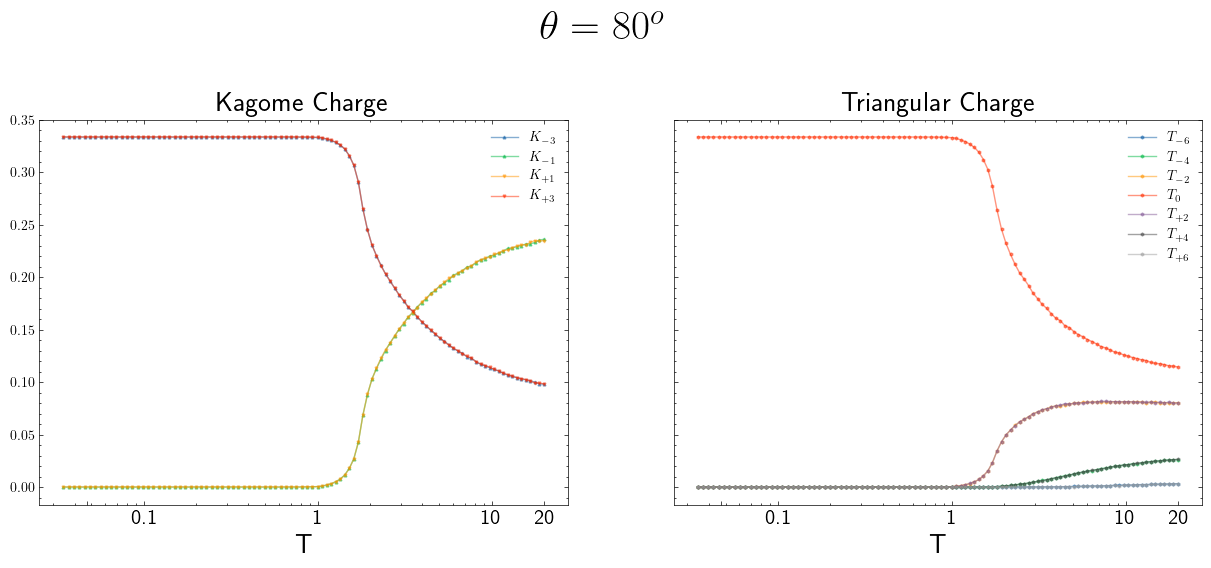

In [130]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K-3']/div, '^-', label='$K_{-3}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
    ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 80^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_80.png', dpi=250)

In [131]:
carga_K, carga_T = cria_df(90, 123)
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 0.0], dtype='object') 
 Index(['Temp', 0.0, 2.0, -2.0, -4.0, 4.0, -6.0, 6.0], dtype='object')


In [132]:
carga_K.columns.values[1] = 'K0'
# carga_K.columns.values[2] = 'K+1'
# carga_K.columns.values[3] = 'K+3'
# carga_K.columns.values[4] = 'K-3'

carga_T.columns.values[1] = 'T0'
carga_T.columns.values[2] = 'T+2'
carga_T.columns.values[3] = 'T-2'
carga_T.columns.values[4] = 'T-4'
carga_T.columns.values[5] = 'T+4'
carga_T.columns.values[6] = 'T-6'
carga_T.columns.values[7] = 'T+6'
print(carga_K.columns,'\n', carga_T.columns)

Index(['Temp', 'K0'], dtype='object') 
 Index(['Temp', 'T0', 'T+2', 'T-2', 'T-4', 'T+4', 'T-6', 'T+6'], dtype='object')


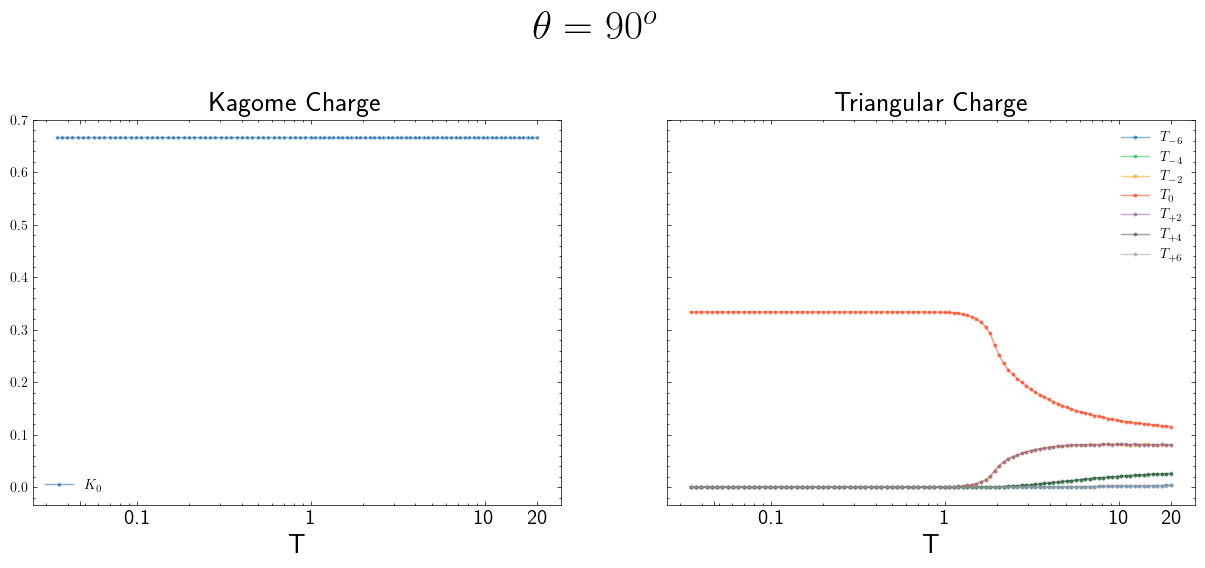

In [133]:
with plt.style.context(['science']):

    fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)


    ax[0].plot(carga_K.Temp, carga_K['K0']/div, '^-', label='$K_{0}$', alpha=0.5, markersize=2)
#     ax[0].plot(carga_K.Temp, carga_K['K-1']/div, '^-', label='$K_{-1}$', alpha=0.5, markersize=2)
#     ax[0].plot(carga_K.Temp, carga_K['K+1']/div, 'v-', label='$K_{+1}$', alpha=0.5, markersize=2)
#     ax[0].plot(carga_K.Temp, carga_K['K+3']/div, 'v-', label='$K_{+3}$', alpha=0.5, markersize=2)


    ax[1].plot(carga_T.Temp, carga_T['T-6']/div, 'h-', label='$T_{-6}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-4']/div, 'h-', label='$T_{-4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T-2']/div, 'h-', label='$T_{-2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T0']/div, 'h-', label='$T_{0}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+2']/div, 'h-', label='$T_{+2}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+4']/div, 'h-', label='$T_{+4}$', alpha=0.5, markersize=2)
    ax[1].plot(carga_T.Temp, carga_T['T+6']/div, 'h-', label='$T_{+6}$', alpha=0.5, markersize=2)


    ax[0].set_title('Kagome Charge', fontsize=20)
    ax[1].set_title('Triangular Charge', fontsize=20)

    for i in [0,1]:
        ax[i].set_xscale('log')
        ax[i].legend()
        ax[i].set_xticks([0.047, 0.1, 1, 10, 20])
        ax[i].set_xticklabels(['', r'0.1', r'1', r'10', r'20'], fontsize=15)
        ax[i].set_xlabel('T', fontsize=20)
        ax[i].set_xlim(0.047, 20)

    # plt.tight_layout()

    fig.suptitle('$\\theta = 90^o$', fontsize=30, y=1.1)
    plt.savefig('charge_theta_90.png', dpi=250)